## База

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
df = pd.read_csv('Train (1).csv')
df = df.drop_duplicates()

In [7]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [9]:
df.shape

(8068, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [11]:
df.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,8068.0,463479.214551,2595.381232,458982.0,461240.75,463472.5,465744.25,467974.0
Age,8068.0,43.466906,16.711696,18.0,30.00,40.0,53.00,89.0
Work_Experience,7239.0,2.641663,3.406763,0.0,0.00,1.0,4.00,14.0
Family_Size,7733.0,2.850123,1.531413,1.0,2.00,3.0,4.00,9.0


In [15]:
for col in df.columns:
    print(f'Уникальных значений в столбике {col} - {df[col].nunique()}')

Уникальных значений в столбике ID - 8068
Уникальных значений в столбике Gender - 2
Уникальных значений в столбике Ever_Married - 2
Уникальных значений в столбике Age - 67
Уникальных значений в столбике Graduated - 2
Уникальных значений в столбике Profession - 9
Уникальных значений в столбике Work_Experience - 15
Уникальных значений в столбике Spending_Score - 3
Уникальных значений в столбике Family_Size - 9
Уникальных значений в столбике Var_1 - 7
Уникальных значений в столбике Segmentation - 4


In [83]:
df = df.drop(columns = ['ID'])

In [17]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [84]:
df = df.dropna()

In [21]:
df.isna().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [85]:
# Числовые признаки
num_cols = [
    'Age',
    'Work_Experience',
    'Family_Size'
]

# Категориальные признаки
cat_cols = [
    'Gender',
    'Ever_Married',
    'Graduated',
    'Profession',
    'Spending_Score',
    'Var_1'
]

feature_cols = num_cols + cat_cols
target_col = 'Segmentation'

In [86]:
X = df[feature_cols]
y = df[target_col]

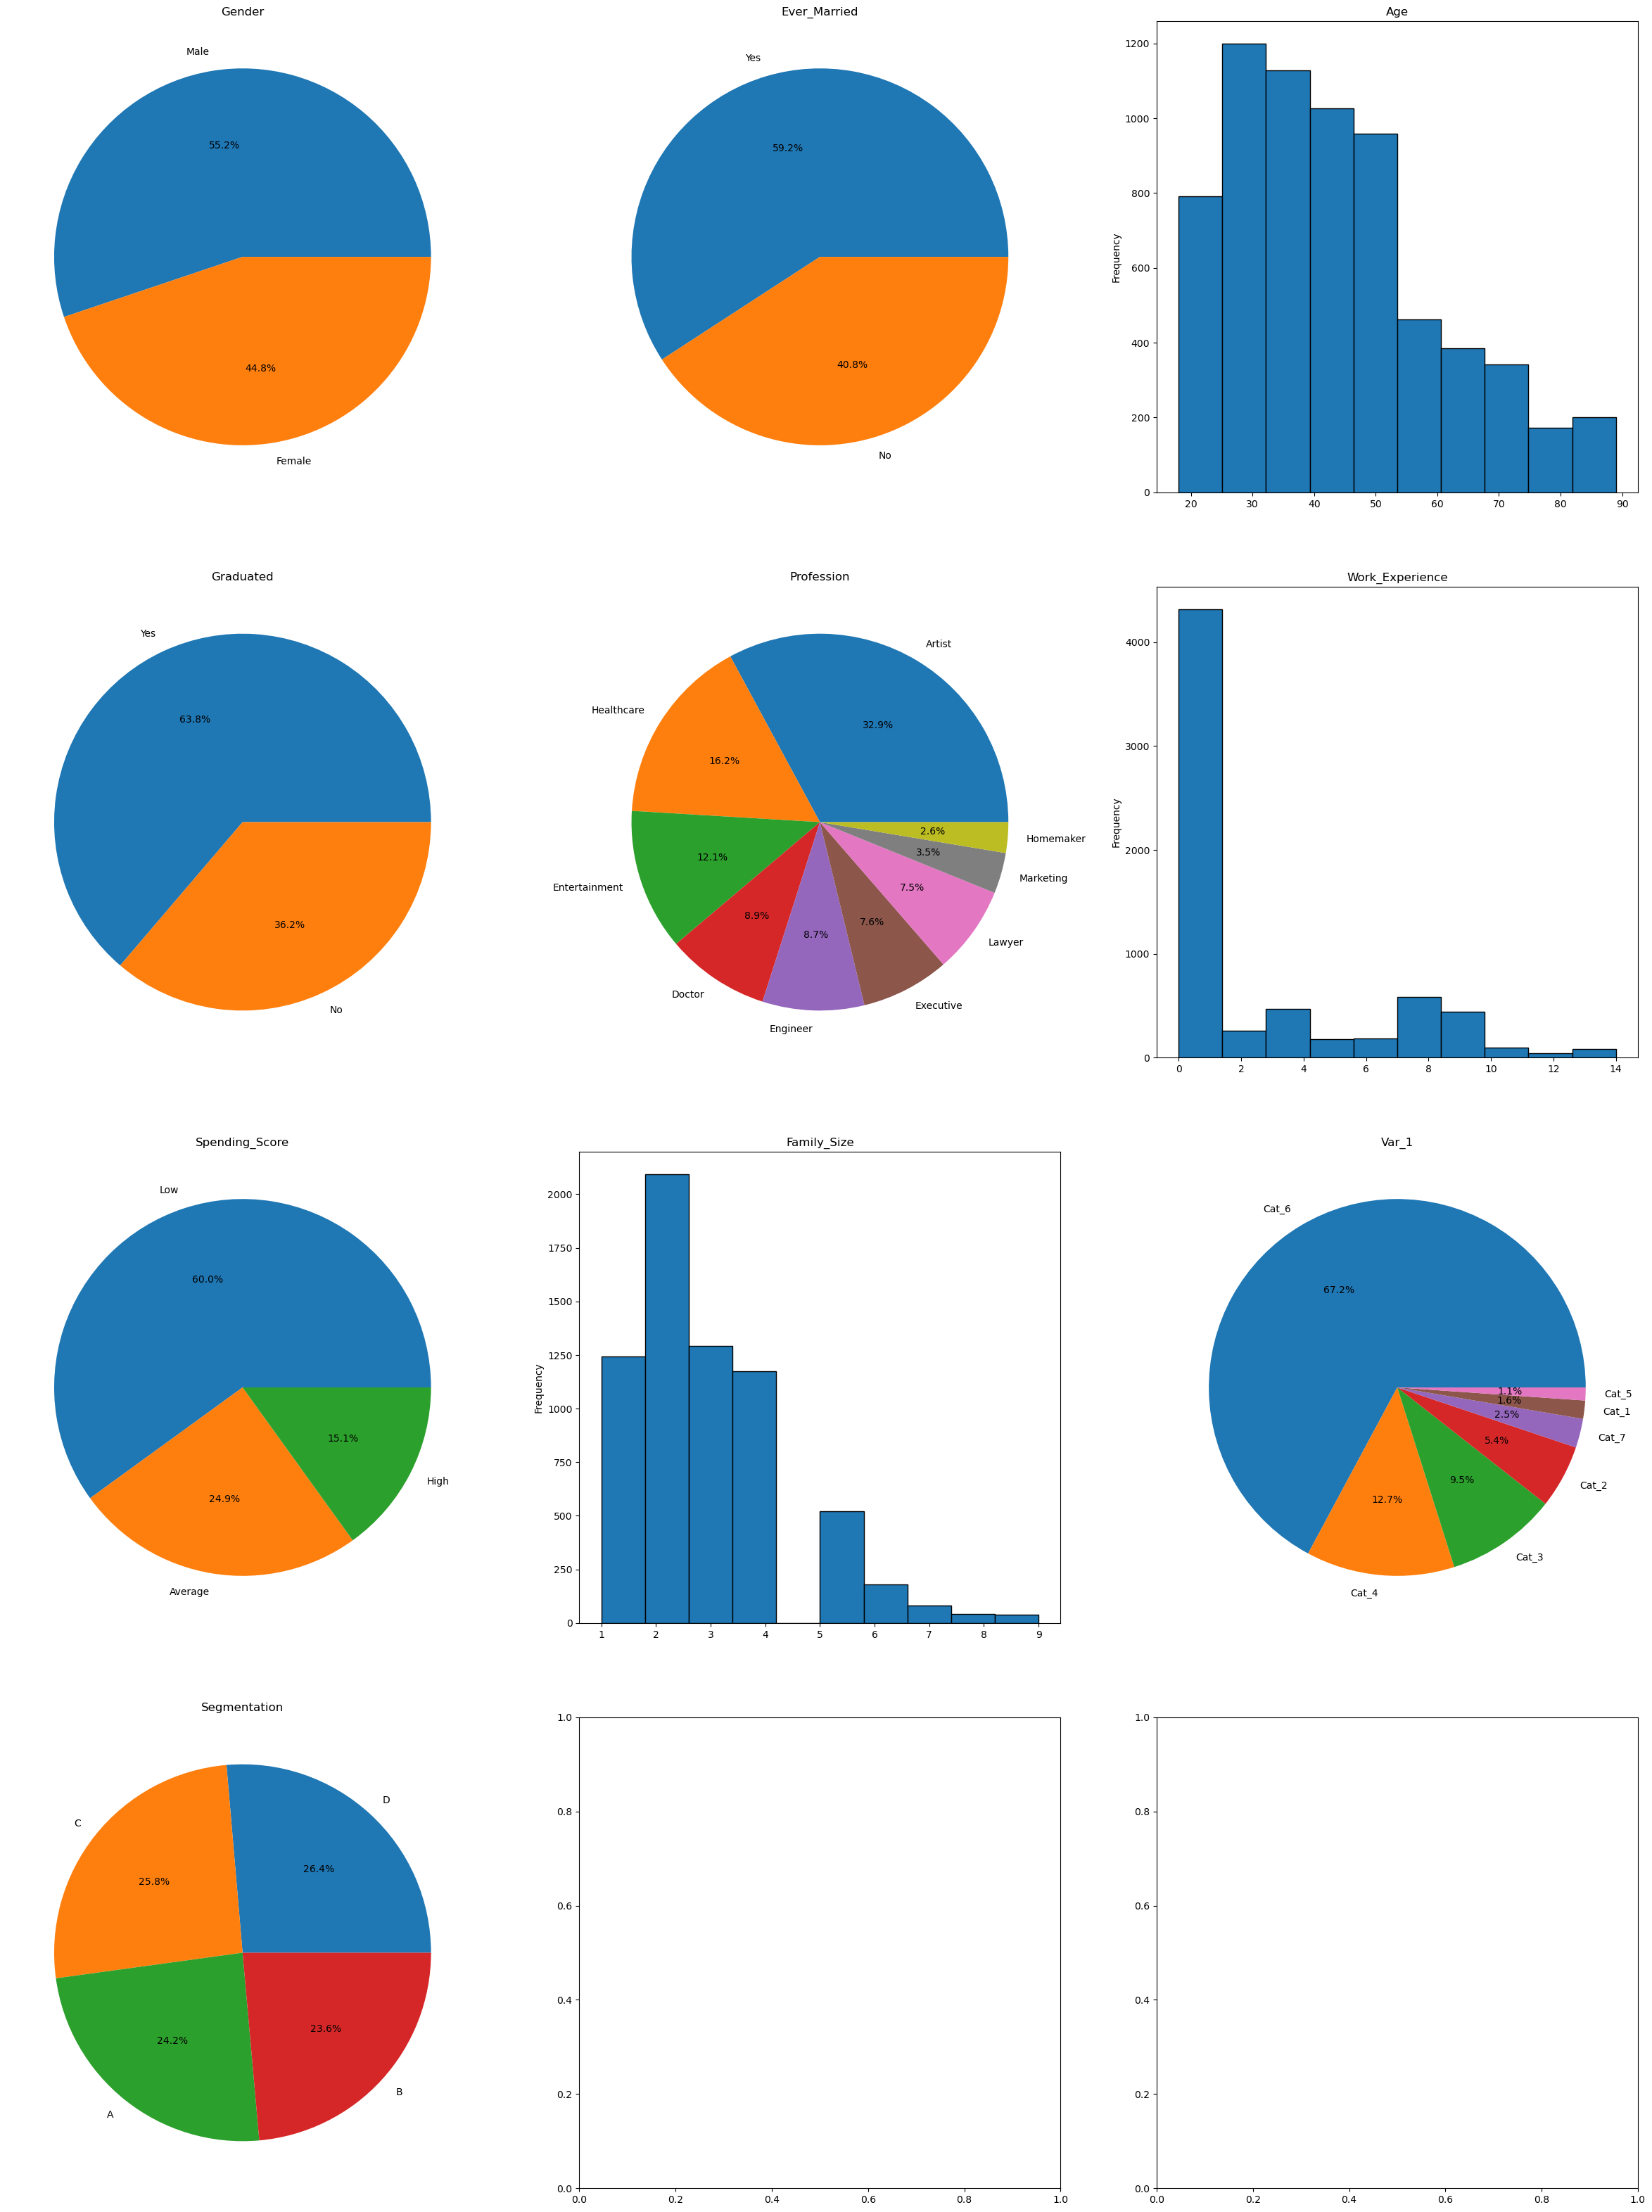

In [33]:
fig, axes = plt.subplots(4, 3, figsize=(30, 40))
for ax, col in zip(axes.flatten(), df.columns):
    ax.set_title(col)
    if col in cat_cols or col == target_col:
        ax.pie(df[col].value_counts(), labels=df[col].value_counts().index ,autopct="%1.1f%%")
    else:
        df[col].plot(kind="hist", ec="black", ax=ax)

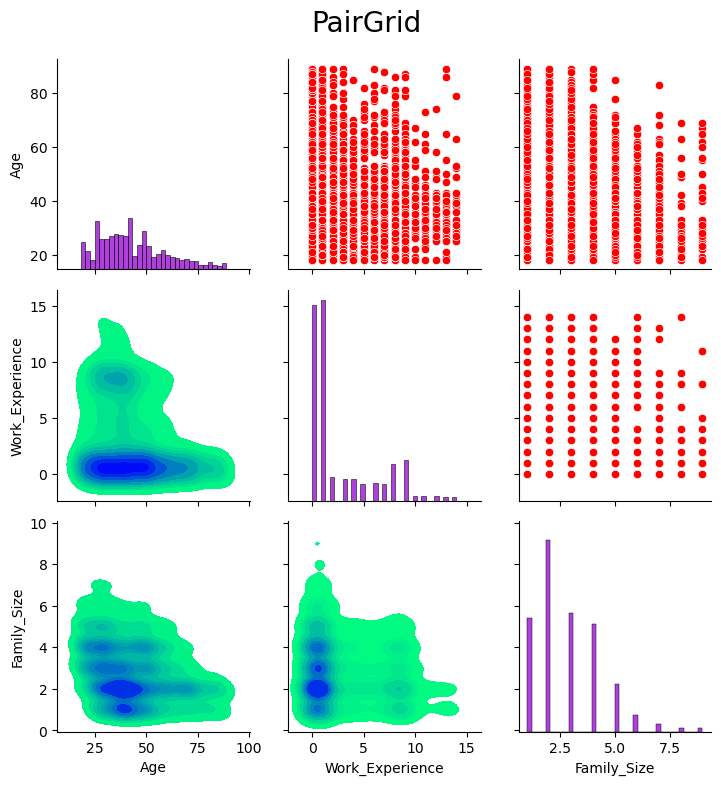

In [34]:
g = sns.PairGrid(df)
g.map_diag(sns.histplot, color = 'darkviolet')
g.map_upper(sns.scatterplot, color = 'red')
g.map_lower(sns.kdeplot, fill = True, cmap = 'winter_r')
g.fig.suptitle('PairGrid', fontsize = 20, y = 1.04)
pass

# feature extraction

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6665 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           6665 non-null   object 
 1   Ever_Married     6665 non-null   object 
 2   Age              6665 non-null   int64  
 3   Graduated        6665 non-null   object 
 4   Profession       6665 non-null   object 
 5   Work_Experience  6665 non-null   float64
 6   Spending_Score   6665 non-null   object 
 7   Family_Size      6665 non-null   float64
 8   Var_1            6665 non-null   object 
 9   Segmentation     6665 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 572.8+ KB


In [40]:
from sklearn.preprocessing import StandardScaler

In [87]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols].values)

In [88]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,-1.303415,No,Healthcare,-0.478430,Low,0.760113,Cat_4,D
2,Female,Yes,1.420092,Yes,Engineer,-0.478430,Low,-1.207580,Cat_6,B
3,Male,Yes,1.420092,Yes,Lawyer,-0.772106,High,-0.551682,Cat_6,B
5,Male,Yes,0.754346,No,Artist,-0.772106,Average,-0.551682,Cat_6,C
6,Male,No,-0.698191,Yes,Healthcare,-0.478430,Low,0.104215,Cat_6,C
...,...,...,...,...,...,...,...,...,...,...
8062,Male,Yes,-0.153490,Yes,Artist,-0.772106,High,1.416011,Cat_6,B
8064,Male,No,-0.516624,No,Executive,0.108922,Low,0.760113,Cat_4,D
8065,Female,No,-0.637669,Yes,Healthcare,-0.478430,Low,-1.207580,Cat_6,D
8066,Female,No,-1.000803,Yes,Healthcare,-0.478430,Low,0.760113,Cat_6,B


In [89]:
le = LabelEncoder()
df[target_col] = le.fit_transform(df[target_col])

In [90]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,-1.303415,No,Healthcare,-0.478430,Low,0.760113,Cat_4,3
2,Female,Yes,1.420092,Yes,Engineer,-0.478430,Low,-1.207580,Cat_6,1
3,Male,Yes,1.420092,Yes,Lawyer,-0.772106,High,-0.551682,Cat_6,1
5,Male,Yes,0.754346,No,Artist,-0.772106,Average,-0.551682,Cat_6,2
6,Male,No,-0.698191,Yes,Healthcare,-0.478430,Low,0.104215,Cat_6,2
...,...,...,...,...,...,...,...,...,...,...
8062,Male,Yes,-0.153490,Yes,Artist,-0.772106,High,1.416011,Cat_6,1
8064,Male,No,-0.516624,No,Executive,0.108922,Low,0.760113,Cat_4,3
8065,Female,No,-0.637669,Yes,Healthcare,-0.478430,Low,-1.207580,Cat_6,3
8066,Female,No,-1.000803,Yes,Healthcare,-0.478430,Low,0.760113,Cat_6,1


In [91]:
df[target_col].value_counts()

3    1757
2    1720
0    1616
1    1572
Name: Segmentation, dtype: int64

In [92]:
from sklearn.preprocessing import OrdinalEncoder

In [93]:
enc = OrdinalEncoder()
df[['Gender', 'Ever_Married', 'Graduated']] = enc.fit_transform(df[['Gender', 'Ever_Married', 'Graduated']])

In [94]:
dummies = pd.get_dummies(df[['Spending_Score', 'Var_1', 'Profession']], drop_first=True)
df = pd.concat([df, dummies], axis = 1)
df = df.drop(columns = ['Spending_Score', 'Var_1', 'Profession'])
df

,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Segmentation,Spending_Score_High,Spending_Score_Low,Var_1_Cat_2,...,Var_1_Cat_6,Var_1_Cat_7,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,1.0,0.0,-1.303415,0.0,-0.478430,0.760113,3,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0.0,1.0,1.420092,1.0,-0.478430,-1.207580,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
3,1.0,1.0,1.420092,1.0,-0.772106,-0.551682,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
5,1.0,1.0,0.754346,0.0,-0.772106,-0.551682,2,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,1.0,0.0,-0.698191,1.0,-0.478430,0.104215,2,0,1,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8062,1.0,1.0,-0.153490,1.0,-0.772106,1.416011,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
8064,1.0,0.0,-0.516624,0.0,0.108922,0.760113,3,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8065,0.0,0.0,-0.637669,1.0,-0.478430,-1.207580,3,0,1,0,...,1,0,0,0,0,0,1,0,0,0
8066,0.0,0.0,-1.000803,1.0,-0.478430,0.760113,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6665 entries, 0 to 8067
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    6665 non-null   float64
 1   Ever_Married              6665 non-null   float64
 2   Age                       6665 non-null   float64
 3   Graduated                 6665 non-null   float64
 4   Work_Experience           6665 non-null   float64
 5   Family_Size               6665 non-null   float64
 6   Segmentation              6665 non-null   int32  
 7   Spending_Score_High       6665 non-null   uint8  
 8   Spending_Score_Low        6665 non-null   uint8  
 9   Var_1_Cat_2               6665 non-null   uint8  
 10  Var_1_Cat_3               6665 non-null   uint8  
 11  Var_1_Cat_4               6665 non-null   uint8  
 12  Var_1_Cat_5               6665 non-null   uint8  
 13  Var_1_Cat_6               6665 non-null   uint8  
 14  Var_1_Ca

In [96]:
df

,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Segmentation,Spending_Score_High,Spending_Score_Low,Var_1_Cat_2,...,Var_1_Cat_6,Var_1_Cat_7,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,1.0,0.0,-1.303415,0.0,-0.478430,0.760113,3,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0.0,1.0,1.420092,1.0,-0.478430,-1.207580,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
3,1.0,1.0,1.420092,1.0,-0.772106,-0.551682,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
5,1.0,1.0,0.754346,0.0,-0.772106,-0.551682,2,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,1.0,0.0,-0.698191,1.0,-0.478430,0.104215,2,0,1,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8062,1.0,1.0,-0.153490,1.0,-0.772106,1.416011,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
8064,1.0,0.0,-0.516624,0.0,0.108922,0.760113,3,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8065,0.0,0.0,-0.637669,1.0,-0.478430,-1.207580,3,0,1,0,...,1,0,0,0,0,0,1,0,0,0
8066,0.0,0.0,-1.000803,1.0,-0.478430,0.760113,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0


In [106]:
X=df.drop(columns = ['Segmentation'])
y=df["Segmentation"]
#check for multi-collinearity
corr=X.corr()
corr.style.background_gradient(cmap='coolwarm')

,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Spending_Score_High,Spending_Score_Low,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
Gender,1.000000,0.123947,0.034160,-0.038971,-0.049582,0.049880,0.053781,-0.077340,-0.013394,0.002312,-0.017439,-0.038960,0.032392,-0.006103,0.011618,-0.220071,0.140140,0.234948,0.018594,-0.124992,-0.032355,-0.036933
Ever_Married,0.123947,1.000000,0.552499,0.175560,-0.098636,-0.073318,0.346461,-0.669010,-0.089725,-0.034641,-0.027407,-0.013811,0.092852,-0.012248,-0.090065,0.016590,0.011956,0.200285,-0.390979,-0.014340,0.192631,-0.103242
Age,0.034160,0.552499,1.000000,0.225086,-0.200995,-0.269557,0.365298,-0.362993,-0.089041,-0.083395,-0.109478,-0.033956,0.207744,-0.048223,-0.125688,-0.036776,-0.021374,0.131354,-0.410768,-0.056606,0.533854,-0.079122
Graduated,-0.038971,0.175560,0.225086,1.000000,0.030065,-0.224953,0.018114,-0.127219,0.004416,-0.041059,-0.202289,-0.027014,0.182586,-0.010858,-0.036595,-0.115493,-0.007187,-0.074719,-0.210666,-0.025813,0.003286,-0.102019
Work_Experience,-0.049582,-0.098636,-0.200995,0.030065,1.000000,-0.068972,-0.066119,0.068280,0.012552,-0.020683,-0.049284,0.000513,0.048685,0.000550,-0.012366,-0.007988,0.008279,-0.027764,0.013535,0.177903,-0.118657,-0.012778
Family_Size,0.049880,-0.073318,-0.269557,-0.224953,-0.068972,1.000000,0.048888,-0.125793,0.078402,0.004977,0.170261,0.054266,-0.195161,0.046227,0.003320,0.027674,-0.018382,0.105128,0.238820,-0.059268,-0.156127,0.027961
Spending_Score_High,0.053781,0.346461,0.365298,0.018114,-0.066119,0.048888,1.000000,-0.517872,-0.023649,-0.067305,-0.039061,-0.016651,0.094466,-0.013970,-0.100066,-0.056111,-0.117550,0.414297,-0.132460,-0.022004,0.293293,-0.025631
Spending_Score_Low,-0.077340,-0.669010,-0.362993,-0.127219,0.068280,-0.125793,-0.517872,1.000000,0.030558,0.052167,0.014620,0.006319,-0.067006,0.008379,0.058684,0.002115,0.015972,-0.232986,0.274490,0.011769,-0.092122,0.100324
Var_1_Cat_2,-0.013394,-0.089725,-0.089041,0.004416,0.012552,0.078402,-0.023649,0.030558,1.000000,-0.081231,-0.095620,-0.026497,-0.337795,-0.040259,0.009565,-0.034094,0.015228,-0.020973,0.090246,0.005343,-0.052770,-0.018362
Var_1_Cat_3,0.002312,-0.034641,-0.083395,-0.041059,-0.020683,0.004977,-0.067305,0.052167,-0.081231,1.000000,-0.130262,-0.036096,-0.460171,-0.054844,0.013927,0.027752,0.025438,-0.055856,0.017856,0.051233,-0.056825,0.045175


## Модели

In [107]:
from sklearn.model_selection import train_test_split

In [110]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [116]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_jobs = -1)

In [118]:
search_space = {
    'n_estimators' : [100, 200, 500],
    'max_depth' : [3,6,9],
    'learning_rate' : ['eta', 0.001, 0.01, 0.1],
    'booster' : ['gbtree', 'gblinear', 'dart'],
    'gamma' : [0.001, 0.01, 0.1],
    'lambda' : [0.01, 0.1, 1, 10]
}

In [119]:
from sklearn.model_selection import GridSearchCV

In [128]:
GS = GridSearchCV(estimator = xgb,
                 param_grid = search_space,
                 scoring = ['accuracy', 'r2'],
                 refit = 'r2', 
                 n_jobs = -1,
                 cv = 5,
                 verbose = 4)

In [129]:
GS.fit(X_train, y_train)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


KeyboardInterrupt: 

In [130]:
GS.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
GS.best_score_

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, f1_score

In [132]:
lr = LogisticRegression(n_jobs = -1)
svc = SVC() 
knn = KNeighborsClassifier(n_jobs= -1)
rf = RandomForestClassifier(n_jobs = -1)
xgb = XGBClassifier(n_jobs = -1)
gb=GradientBoostingClassifier()
abc=AdaBoostClassifier()

In [137]:
def entrenar(model):
    model.fit(X_train, y_train)
    return f1_score(model.predict(X_train), y_train, average = 'weighted'), f1_score(model.predict(X_test), y_test, average = 'weighted')

#Entrenamos
models = {'LogisticRegression': lr,
          'KNeighborsClassifier': knn,
          'SVC': svc,
          'RandomForestClassifier': rf,
          'XGBClassifier': xgb,
          'GradientBoostingClassifier': gb,
          'AdaBoostClassifier': abc}

test_scores={}
train_scores={}
for name, model in models.items():
    test_scores[name]=entrenar(model)[1]
    train_scores[name]=entrenar(model)[0]

test_scores.items()

dict_items([('LogisticRegression', 0.5215936361067746), ('KNeighborsClassifier', 0.4509040054312986), ('SVC', 0.5202878361491535), ('RandomForestClassifier', 0.4612184777642763), ('XGBClassifier', 0.49421671669931455), ('GradientBoostingClassifier', 0.5262319557786592), ('AdaBoostClassifier', 0.5107173017970755)])

In [139]:
from sklearn.model_selection import cross_val_score, cross_val_predict,StratifiedKFold,GridSearchCV, RandomizedSearchCV

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
#from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier

In [153]:
random_state = 42
classifiers = [] 
classifiers.append(LogisticRegression(random_state=random_state, n_jobs = -1))
classifiers.append(SVC(random_state=random_state))
classifiers.append(KNeighborsClassifier(n_jobs= -1))
classifiers.append(AdaBoostClassifier(random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state, n_jobs= -1))
classifiers.append(ExtraTreesClassifier(random_state=random_state, n_jobs= -1))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(LGBMClassifier(random_state = random_state, n_jobs= -1))
classifiers.append(CatBoostClassifier(logging_level='Silent'))                   

In [154]:
kfold = StratifiedKFold(5)

In [171]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, make_scorer

In [162]:
accuracy = []
precision = []
recall = []
f1 = []
f2 =[]
roc_auc = []

for classifier in classifiers :
    y_pred = cross_val_predict(classifier,X_train,y_train, cv = kfold)
    accuracy.append(accuracy_score(y_pred,y_train))
    precision.append(precision_score(y_pred,y_train, average = 'weighted'))
    recall.append(recall_score(y_pred,y_train, average = 'weighted'))
    f1.append(f1_score(y_pred,y_train, average = 'weighted'))
    f2.append(fbeta_score(y_pred,y_train, beta = 2, average = 'weighted'))

In [165]:
index = ['LogisticRegression', 'SVC', 'KNeighbors', "AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","LGBMClassifier","CatBoostClassifier"]
metrics = pd.DataFrame({"Accuracy" : accuracy, "Precision" : precision, "Recall" : recall, "f1" : f1, "f2" : f2})
metrics.index = index

In [166]:
metrics

,Accuracy,Precision,Recall,f1,f2
LogisticRegression,0.491232,0.518852,0.491232,0.501620,0.494415
SVC,0.516341,0.523383,0.516341,0.518608,0.516944
KNeighbors,0.440614,0.437260,0.440614,0.437408,0.438949
AdaBoost,0.470905,0.517243,0.470905,0.486950,0.475234
RandomForest,0.448784,0.456659,0.448784,0.452231,0.450043
ExtraTrees,0.429055,0.431822,0.429055,0.430285,0.429509
GradientBoosting,0.503786,0.521555,0.503786,0.510493,0.505949
LGBMClassifier,0.486847,0.499001,0.486847,0.491779,0.488534
CatBoostClassifier,0.483260,0.492621,0.483260,0.487177,0.484641


Лучшая модель - SVC. Дотюним ее гиперпараметры

In [172]:
svc = SVC()

svc_param_grid = {"C": [0.01, 0.1, 1, 10],
              "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
              "gamma" :['scale', 'auto']}


grid = GridSearchCV(svc,param_grid = svc_param_grid, cv=kfold, scoring=make_scorer(f1_score, average = 'weighted'))

grid.fit(X_train,y_train)

svc_best = grid.best_estimator_

# Best score
print(grid.best_params_)
print(grid.best_score_)

{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
0.5174976901741142


In [173]:
svc = SVC()

svc_param_grid = {"C": [10, 15, 20, 30 , 40],
              "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
              "gamma" :['scale', 'auto']}


grid = GridSearchCV(svc,param_grid = svc_param_grid, cv=kfold, scoring=make_scorer(f1_score, average = 'weighted'))

grid.fit(X_train,y_train)

svc_best = grid.best_estimator_

# Best score
print(grid.best_params_)
print(grid.best_score_)

{'C': 15, 'gamma': 'auto', 'kernel': 'rbf'}
0.5178387987695742
